In [15]:
import numpy as np
import matplotlib.pyplot as plt

## First, illustrative SPDE for the dissertation

I will use a basic 1D parabolic SPDE on the first slide, talk about what a solution of it means, and how this lends itself to Monte-Carlo methods. 2 slides to go SPDEs and MLMC, then onto goal and timeline. Then onto more advanced methods.

First slides: illustrative SPDE solution

$$\frac{\partial u}{\partial t} = \Delta u + \xi (x,t)$$
$$T = 0.2, u(0,t) = u(1,t) = 0$$

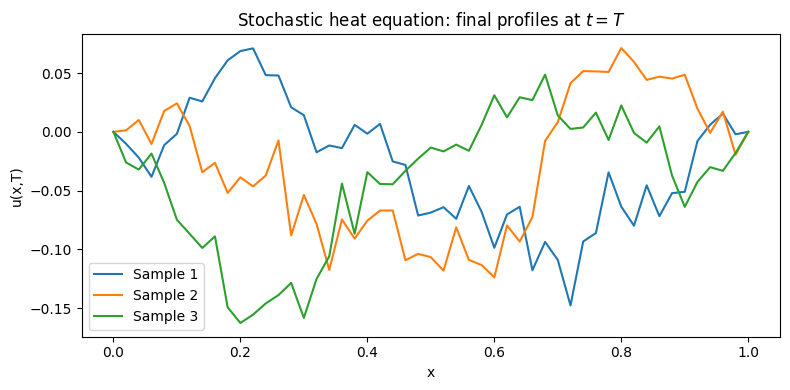

In [53]:
Nx = 51
dx = 1/(Nx - 1)
T = 0.2
dt = 1e-4
sigma = 0.2
nsamp = 3
plot_every = 20

nsteps = int(T/dt)
x = np.linspace(0.0, 1.0, Nx)
final_profiles = np.zeros((nsamp, Nx))
uhistory = np.zeros((nsteps // plot_every + 1, Nx))
uhistory.shape

for s in range(nsamp):
    u = np.zeros(Nx)
    save_idx = 0

    for n in range(nsteps):

        # finite-difference Laplacian
        lap = (np.roll(u, -1) -2.0 * u + np.roll(u, 1)) / dx**2
        lap[0] = lap[-1] = 0.0

        # additive space-time white noise increment
        dW = sigma * np.sqrt(dt/dx) * np.random.randn(Nx)
        dW[0] = dW[-1] = 0.0

        # Euler-Maruyama update
        u += dt * lap + dW

        if s == 0 and n % plot_every == 0:
            uhistory[save_idx] = u
            save_idx += 1

    final_profiles[s] = u

plt.figure(figsize=(8, 4))
for s in range(nsamp):
    plt.plot(x, final_profiles[s], label=f"Sample {s+1}")
plt.title("Stochastic heat equation: final profiles at $t=T$")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.legend()
plt.tight_layout()
plt.savefig("Documents/presentation/graphics/stochastic_heat_equation_intro.jpeg", dpi=150)
plt.show()

level:  1
timestep:  1
path [1.         0.54974228]
level:  2
timestep:  1
path [1.         0.86851498 0.        ]
timestep:  2
path [1.         0.86851498 0.75613114]
level:  4
timestep:  1
path [1.         1.17152508 0.         0.         0.        ]
timestep:  2
path [1.         1.17152508 1.32505386 0.         0.        ]
timestep:  3
path [1.         1.17152508 1.32505386 1.24466648 0.        ]
timestep:  4
path [1.         1.17152508 1.32505386 1.24466648 1.38139174]
level:  8
timestep:  1
path [1.         0.95503498 0.         0.         0.         0.
 0.         0.         0.        ]
timestep:  2
path [1.         0.95503498 0.9129505  0.         0.         0.
 0.         0.         0.        ]
timestep:  3
path [1.         0.95503498 0.9129505  0.86860205 0.         0.
 0.         0.         0.        ]
timestep:  4
path [1.         0.95503498 0.9129505  0.86860205 0.98797274 0.
 0.         0.         0.        ]
timestep:  5
path [1.         0.95503498 0.9129505  0.86860205 0

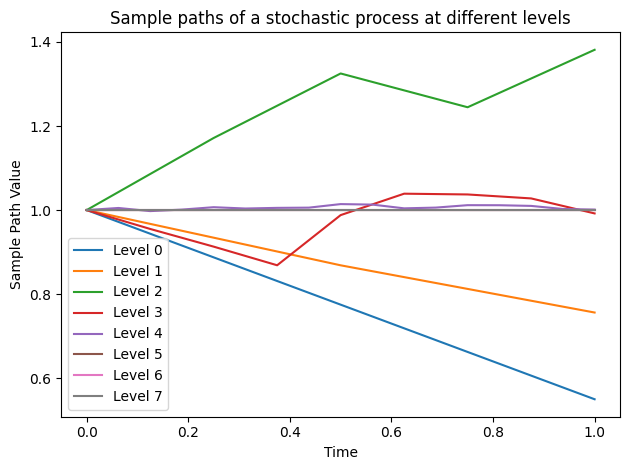

In [38]:
# Now I wish to construct a plott that shows we construct multiple levels of a sample path
# Let's consider a single sample path in 1D. 
T = 1; mu = 0; L = 8
L_array = [2**l for l in range(0, L)]
delta_S = lambda S0, mu, dt: mu * dt + np.sqrt(dt) * np.random.randn()
sample_paths = {} # will have a key-value pair for each level and the corresponding sample path

for l in L_array:
    print("level: ", l)
    dt = T / 2**l  # number of time steps at level l
    S = np.zeros(l + 1)
    S[0] = 1  # initial condition
    for i in range(1, l + 1):
        print("timestep: ", i)
        S[i] = S[i - 1] + delta_S(S[i - 1], mu, dt)
        print("path", S)
    sample_paths[l] = S

for i, l in enumerate(L_array):
    plt.plot(np.linspace(0, T, l + 1), sample_paths[l], label=f"Level {i}")
plt.title("Sample paths of a stochastic process at different levels")
plt.xlabel("Time")
plt.ylabel("Sample Path Value")
plt.legend()
plt.tight_layout()
# plt.savefig("Documents/presentation/graphics/stochastic_process_sample_paths.jpeg", dpi=150)
plt.show()


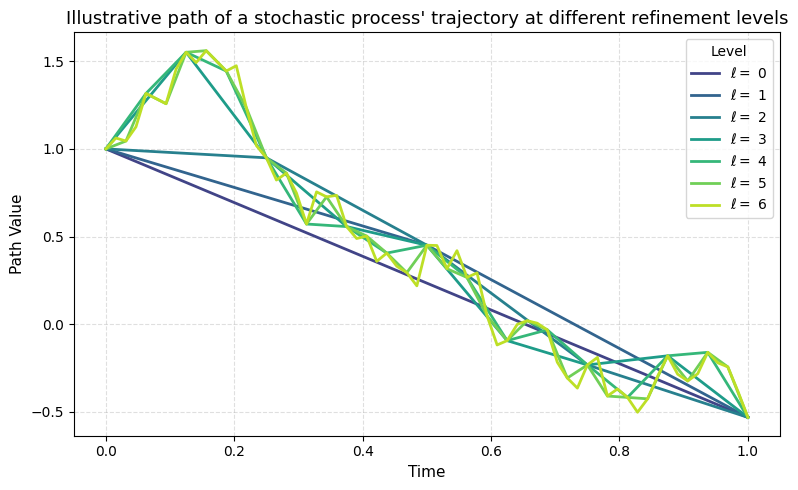

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
mu = 0.0
L_max = 6
levels_to_plot = [2**l for l in range(0, L_max+1)]
seed = 42
np.random.seed(seed)

# Generate fine increments for the highest level
fine_N = 2**L_max
dt_fine = T / fine_N
dW_fine = np.sqrt(dt_fine) * np.random.randn(fine_N)

# Construct sample paths at coarser levels by aggregating increments
sample_paths = {}
for N in levels_to_plot:
    step = fine_N // N
    dW = dW_fine.reshape(N, step).sum(axis=1)
    S = np.zeros(N + 1)
    S[0] = 1.0
    for i in range(1, N + 1):
        S[i] = S[i - 1] + mu * (T / N) + dW[i - 1]
    sample_paths[N] = S

# Plotting
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(levels_to_plot)))

for i, (N, color) in enumerate(zip(levels_to_plot, colors)):
    time_grid = np.linspace(0, T, N + 1)
    plt.plot(time_grid, sample_paths[N], label=rf'$\ell =$ {int(np.log2(N))}', lw=2, color=color)

plt.title("Illustrative path of a stochastic process' trajectory at different refinement levels", fontsize=13)
plt.xlabel("Time", fontsize=11)
plt.ylabel("Path Value", fontsize=11)
plt.legend(title="Level", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("Documents/presentation/graphics/stochastic_process_sample_paths.jpeg", dpi=300)
plt.show()
